# Manipulating text using Python

This section introduces you to the very basics of manipulating text in Python.

After reading this section, you should:

 - understand the difference between rich text, structured text and plain text
 - understand the concept of text encoding
 - know how to load plain text files into Python

## Computers and text

Computers can store and represent text in different formats. Knowing the distinction between different types of text is crucial for processing them programmatically.

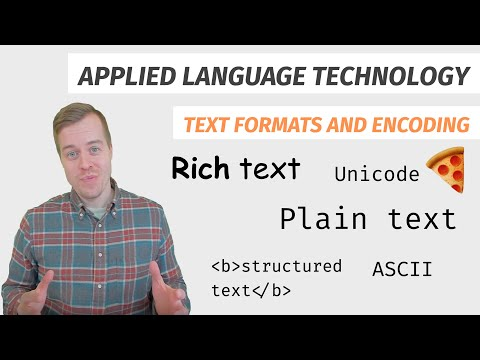

In [1]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('P-om89HKx80', height=350, width=600)

### What is rich text?

Word processors, such as Microsoft Word, produce [rich text](https://en.wikipedia.org/wiki/Formatted_text), that is, text whose appearance has been formatted or styled in a specific way.

Rich text allows defining specific visual styles for document elements. Headers, for example, may use a different font than the body text, which may in turn feature *italic* or **bold** fonts for emphasis. Rich text can also include various types of images, tables and other document elements.

Rich text is the default format for modern what-you-see-is-what-you-get word processors.

### What is plain text?

Unlike rich text, [plain text](https://en.wikipedia.org/wiki/Plain_text) does not contain any information about the visual appearance of text, but consists of *characters* only.

Characters, in this context, refers to letters, numbers, punctuation marks, spaces and line breaks.

The definition of plain text is fairly loose, but generally the term refers to text which lacks any formatting or style information.


### What is structured text?

Structured text may be thought of as a special case of plain text, which includes character sequences that are used to format the text for display.

Forms of structured text include text described using mark-up languages such as XML, Markdown or HTML.

The example below shows a plain text sentence wrapped into HTML tags for paragraphs `<p>`. 

The opening tag `<p>` and the closing tag `</p>` instruct the computer that any content placed between these tags form a paragraph.

``` 
<p>This is an example sentence.</p>
```

This information is used for structuring plain text when *rendering* text for display, typically by styling its appearance.

If you double-click any content cell in this Jupyter Notebook, you will see the underlying structured text in Markdown.

Running the cell renders the structured text for visual inspection!

### Why does this matter?

If you collect a bunch of texts for a corpus, chances are that some originated in rich or structured format, depending on the medium these texts came from.

If you collect printed documents that have been digitized using a technique such as [optical character recognition](https://en.wikipedia.org/wiki/Optical_character_recognition) (OCR) and subsequently converted from rich into plain text, the removal of formatting information is likely to introduce errors into the resulting plain text. Working with this kind of "dirty" OCR can have an impact on the results of text analysis (Hill & Hengchen [2019](https://doi.org/10.1093/llc/fqz024)).

If you collect digital documents by scraping discussion forums or websites, you are likely to encounter traces of structured text in the form of markup tags, which may be carried over to plain text during conversion.

Plain text is by far the most interchangeable format for text, as it is easy to read for computers. This is why programming languages work with plain text, and if you plan to use programming languages to manipulate text, you need to know what plain text is. 

To summarise, when working with plain text, you may need to deal with traces left by conversion from rich or structured text.

## Text encoding

To be read by computers, plain text needs to be *encoded*. This is achieved using *character encoding*, which maps characters (letters, numbers, punctuation, whitespace ...) to a numerical representation understood by the computer.

Ideally, we should not have to deal with low-level operations such as character encoding, but practically we do, because there are multiple systems for encoding characters, and these codings are not compatible with each other. This is the source of endless misery and headache when working with plain text.

There are two character encoding systems that you are likely to encounter: ASCII and Unicode.

### ASCII

[ASCII](https://en.wikipedia.org/wiki/ASCII), which stands for American Standard Code for Information Interchange, is a pioneering character encoding system that has provided a foundation for many modern character encoding systems.

ASCII is still widely used, but is very limited in terms of its character range. If your language happens to include characters such as ä or ö, you are out of luck with ASCII.

### Unicode

[Unicode](https://en.wikipedia.org/wiki/Unicode) is a standard for encoding text in most writing systems used across the world, covering nearly 140 000 characters in modern and historic scripts, symbols and emoji.

For example, the pizza slice emoji 🍕 has the Unicode "code" `U+1F355`, whereas the corresponding code for a whitespace is `U+0020`.

Unicode can be implemented by different character encodings, such as [UTF-8](https://en.wikipedia.org/wiki/UTF-8), which is defined by the Unicode standard.

UTF-8 is backwards compatible with ASCII. In other words, the ASCII character encodings form a subset of UTF-8, which makes our life much easier. 

Even if a plain text file has been *encoded* in ASCII, we can *decode* it using UTF-8, but **not vice versa**.

## Loading plain text files into Python

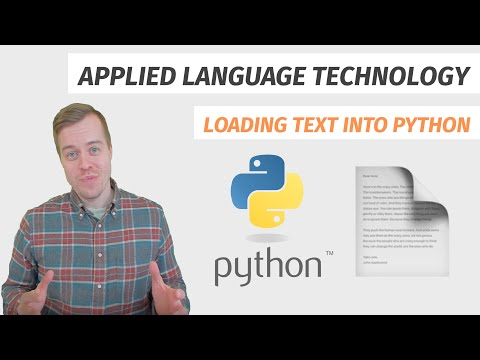

In [2]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('HMsoCeCn5rA', height=350, width=600)

Plain text files can be loaded into Python using the `open()` function.

The first argument to the `open()` function must be a string, which contains a *path* to the file that is being opened.

In this case, the directory `data` contains a file named `NYT_1991-01-16-A15.txt`. The directory and the filename are separated by the backslash `/`, as shown below.

In [ ]:
# Open a file and assign it to the variable 'file'
file = open(file='data/NYT_1991-01-16-A15.txt', mode='r', encoding='utf-8')

By default, Python 3 assumes that the text is encoded using UTF-8, but we can make this explicit using the `encoding` argument. 

The `encoding` argument takes a string as its input: we pass `utf-8` to the argument to declare that the plain text is encoded in UTF-8.

Moreover, we use the `mode` argument to define that we only want to open the file for *reading*, which is done by passing the string `r` to the argument.

If we call the variable `file`, we see a Python object that contains three arguments: the path to the file under the argument `name` and the `mode` and `encoding` arguments that we specified above.

In [ ]:
# Call the variable to examine the object
file

Calling the file, however, is not sufficient for inspecting its contents. We must use the `read()` method provided by this object to read the contents of the file first. We then assign the result to the variable `text`.

In [ ]:
# Use the read() method to read the file context and assign the
# result to the variable 'text'
text = file.read()

Let's check the result of the `read()` method which is now stored under the variable `text`.

The text is fairly long, so let's just take a slice of the text containing the first 500 characters, which can be achieved using brackets `[:500]`.

As we learned in [Part I](../part_i/02_getting_started_with_python.ipynb), adding brackets directly after the name of a variable allows accessing parts of the object, if the object in question allows this. For example, the expression `text[1]` would retrieve the character at position 1 in the string object under the variable `text`.

Adding the colon `:` as a prefix to the number instructs Python to retrieve all characters contained in the string up to the 500th character.

In [ ]:
# Call the first 500 characters under the variable 'text'
text[:500]

Most of the text is indeed legible, but there are some strange character sequences, such as `\ufeff` in the very beginning of the text, and the numerous `\n` sequences occurring throughout the text.

The `\ufeff` sequence is simply an explicit declaration ("signature") that the file has been encoded using UTF-8. Not all UTF-8 encoded files contain this sequence.

The `\n` sequences, in turn, indicate a line change.

This becomes evident if we use Python's `print()` function to print the first 1000 characters stored in the `text` variable.

In [ ]:
# Print the first 1000 characters under the variable 'text'
print(text[:1000])

As you can see, Python knows how to interpret `\n` character sequences and inserts a line break if it encounters this sequence when printing the string contents.

### Quick exercise

Answer the following questions:

1. Are both examples above *plain text*?
2. Can you find traces left by the process of digitising the original text?

## Manipulating text

Because the entire text stored under the variable `text` is a string object, we can use all methods available for manipulating strings.

Let's use the `replace()` method to replace all line breaks `"\n"` with empty strings `""` and store the text under the variable `processed_text`. 

Finally, we use the `print()` function to print out a slice containing the first 1000 characters using the brackets `[:1000]`.

In [ ]:
# Replace line breaks \n with empty strings and assign the result to 
# the variable 'processed_text'
processed_text = text.replace("\n", "")

# Print out the first 1000 characters under the variable 'processed_text'
print(processed_text[:1000])

This simple replacement operation would allow us to remove erroneous line breaks within the text.

We can still identify actual line breaks by the indentations at the beginning of each paragraph, which are marked by three whitespaces.

We can use this information to insert actual line breaks back into the text by replacing sequences of three whitespaces with the line break sequence and three whitespaces.

In [ ]:
# Replace three whitespaces with a line break and three white spaces
# Store the result under the same variable 'processed_text'
processed_text = processed_text.replace("   ", "\n    ")

# Print out the first 1000 characters under the variable 'processed_text'
print(processed_text[:1000])

Note that the replacement operation above causes the article title and source information to form a single paragraph, which also now misses some whitespace characters. In other words, one must always pay attention to unwanted effects of replacements and other transformations.

Moreover, each pattern requires its own call to the `replace()` method, which makes the process extremely tedious if one has multiple patterns to find and replace.

To make the process more efficient, we can leverage two other Python data structures: *lists* and *tuples*.

Let's start by defining a list named `pipeline`. We can create and populate a list by simply placing objects within brackets `[]`. Each list item must be separated by a comma (`,`).

As we saw above, the `replace()` method takes two strings as inputs.

To combine two strings into a single Python object, the most obvious candidate is a data structure named *tuple*, which consist of finite, ordered lists of items.

Tuples are marked by parentheses `( )`: items in a tuple are also separated by a comma.

In [ ]:
# Define a list with two tuples, of which each consist of two strings
pipeline = [("\n", ""), ("   ", "\n   ")]

This shows how different data structures are often nested in Python: the list consists of tuples, and the tuples consist of string objects.

We can now perform a `for` loop over each item in the list.

Each item in the list consists of a tuple, which contains two strings.

Note that to enter a `for` loop, Python expects the next line to be indented. Press the <kbd>Tab ↹</kbd> key on your keyboard to move the cursor.

What happens next is exactly same that we did before with using the `replace()` method, but instead of manually defining the strings that we want to replace, we use the strings contained in the variables `old` and `new`!

After each loop, we automatically store the result in to the variable `updated_text`.

In [ ]:
# Let's first create a copy of the original text to manipulate during the loop
updated_text = text

# Loop over tuples in the list 'pipeline'. Each tuple has two values, which we 
# assign to variables 'old' and 'new' on the fly!
for old, new in pipeline:
    
    # Use the replace() method to replace the string under the variable 'old' 
    # with the string under the variable new 'new'
    updated_text = updated_text.replace(old, new)

In [ ]:
print(updated_text[:1000])

The syntax for the `for` loop is as follows: declare the beginning of a loop using `for`, followed by a *variable* assigned to the items retrieved from the list.

The list that is being looped over is preceded by `in` and the name of the variable assigned to the entire *list*.

To better understand how a `for` loop works, let's define only one variable, `our_tuple`, to refer to the items that we fetch from the list.

In [ ]:
# Loop over the items under the variable 'pipeline'
for our_tuple in pipeline:
    
    # Print the returned object
    print(our_tuple)

This print outs the tuples!

Python is smart enough to understand that a single variable refers to the single items, or *tuples* in the list, whereas for two items, it must proceed to the *strings* contained within the tuple.

When writing `for` loops, pay close attention to the items contained in the list!

### Quick exercise

The text stored under `update_text` still contains many traces of conversion from a printed document to digital text.

Examine, for instance, the variety of quotation marks used in the text (e.g. `”, ’, "`) and hyphenation (e.g. `- `).

Create a list named `new_pipeline` and define **tuples** which each contain two **strings**: what is to be replaced and its replacement.

Then write a `for` loop and use the `replace()` method to apply these patterns to `updated_text`.

In [ ]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)


This should have given you an idea of the basic issues involved in loading and manipulating text using Python. 

The [following section](02_basic_text_processing_continued.ipynb) builds on these techniques to manipulate texts more efficiently.